<a href="https://colab.research.google.com/github/pranavmp-10-000/ChequeDetection/blob/main/ChequeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.25 MiB | 24.62 MiB/s, done.
Resolving deltas: 100% (10000/10000), done.


In [4]:
!unzip -q /content/drive/MyDrive/ChequeDetection/data.zip -d data/

In [5]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

(1093, 2372, 3)


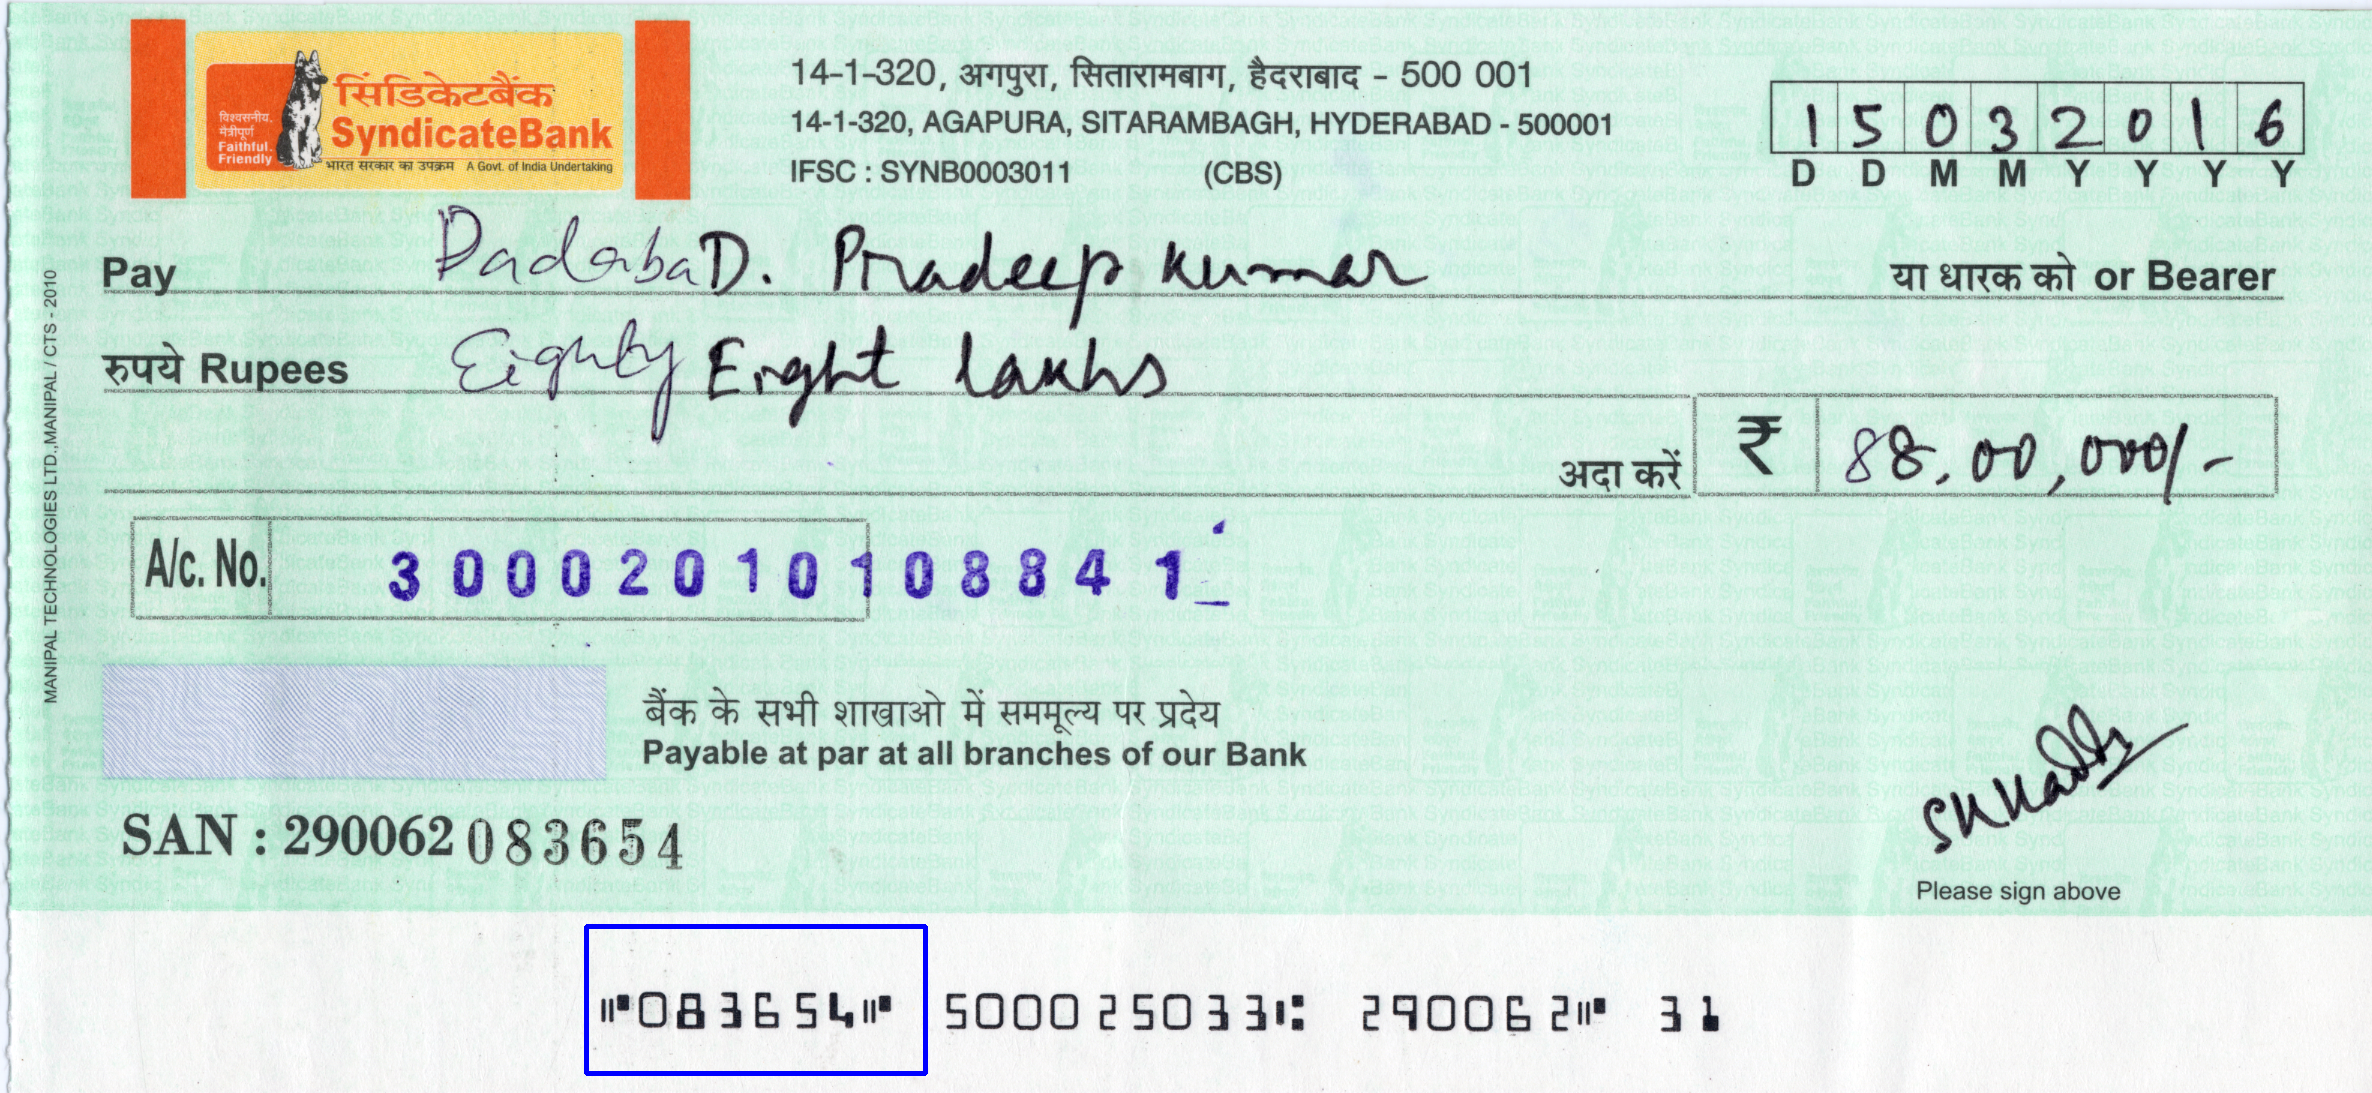

In [6]:
img = cv.imread('/content/data/Images/Cheque083654.jpg')
print(img.shape)
#img = cv.resize(img, (0,0), fx=1, fy=0.8)
img = cv.rectangle(img,(int(0.2472175379426644*2372),int(0.8473924977127173*1093)),
                   (int((0.2472175379426644+0.1431281618887015)*2372),
                    int((0.8473924977127173+0.13430924062214086)*1093)),(255, 0, 0),3)
cv2_imshow(img)

#YOLO

In [7]:
%cd /content

/content


In [8]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [9]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!make

# Helper Functions

In [11]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Train

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
!cp /content/data/yolov4-obj.cfg /content/drive/MyDrive/ChequeDetection/yolov4-obj.cfg

In [ ]:
!./darknet detector train /content/data/obj.data\
 /content/drive/MyDrive/ChequeDetection/yolov4-obj.cfg\
  /content/drive/MyDrive/ChequeDetection/yolov4-obj_last.weights -dont_show -map

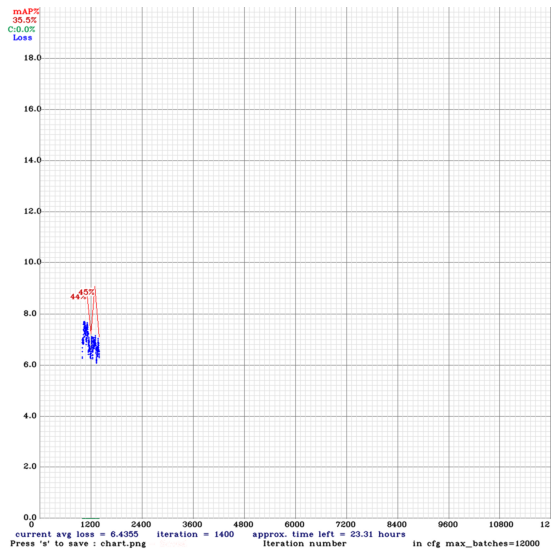

In [19]:
imShow('chart.png')

In [24]:
!./darknet detector test /content/data/obj.data /content/drive/MyDrive/ChequeDetection/yolov4-obj.cfg\
 /content/drive/MyDrive/ChequeDetection/yolov4-obj_last.weights\
 /content/data/Images/Cheque083654.jpg -thresh 0.4

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 

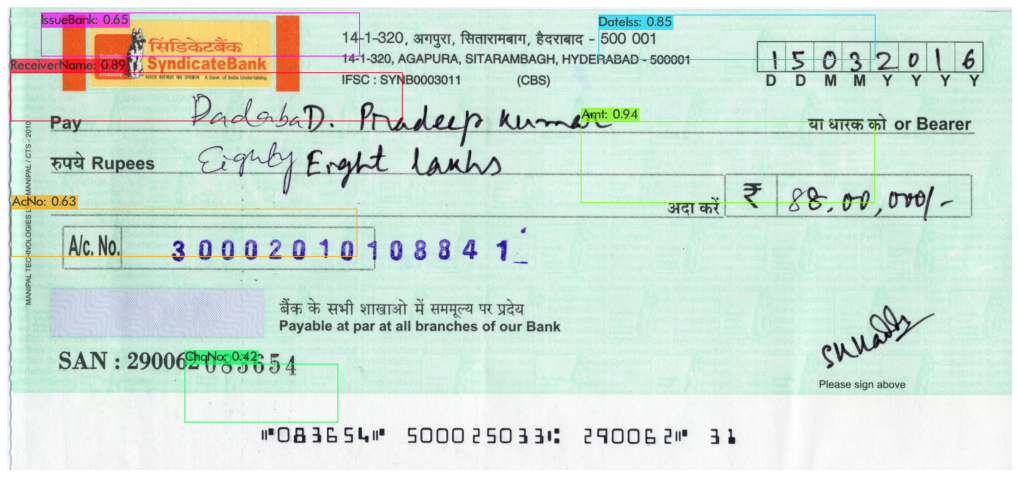

In [25]:
imShow('predictions.jpg')